# Sentences and parts-of-speech

In this notebook, you will define a file for analysis, and the script will output interesting features & characteristics of the text. --Eric Lease Morgan

In [1]:
# configure; define some constants
CARREL   = 'author-charlesIiKingOfEngland-from-freebo'
TEMPLATE = './carrels/%s/etc/reader.txt'
KEYWORD  = 'god'
KEYWORDS = [ 'god', 'king', 'wine' ]
HEIGHT   = 960
WIDTH    = 1280
COLOR    = 'white'


In [2]:
# require
from nltk import *
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [3]:
# read the given file, and do a bit of normalization against it
file   = TEMPLATE % CARREL
data = open( file ).read()
data = data.replace( '\t', '' )
data = data.replace( '\n', '' )


In [4]:
# create a list of all sentences
sentences = sent_tokenize( data )


In [5]:
# denote a sentence and output it
S = 4
sentences[ 4 ]


'text creation partnership, ann arbor, mi ; oxford (uk) : - (eebo-tcp phase ).'

In [6]:
# create a new list of sentences containing the given keyword
sentences = [ sentence for sentence in sentences if KEYWORD in sentence ] 
for sentence in sentences :
    print( sentence )
    print()
    

dread soveraign , with hearts full of unspeakable joy we presume to approach your royal presence , and with all our souls bless almighty god for the late wonderful discovery of the hellish conspiracy begun and carryed on by desperate persons of fanatical , atheistical and republican principles , who impudently assuming to themselves the name of true protestants and patriots , did at first by popular insinuations and other ar●ifices , project the undermining the best religion and government in the world ; and afterwards being therein prevented by your majesties unwearied care and admirable conduct , proceeded to contrive the horrid paricide of your sacred person , the barbarous assassination of your royal brother , the dear partaker ot your sufferings , the involving these nations in blood and confusion , and the utter destruction of this monarchy .

and we do repeat our solemn protestations to stand by and defend your sacred majesty and lawful successors with our lives and fortunes , a

In [7]:
# identify a sentence of interest, tokenize it, and extract parts-of-speech
S    = 5
tags = pos_tag( word_tokenize( sentences[ S ] ) )

# output
tags


[('god', 'NNS'), ('save', 'VBP'), ('the', 'DT'), ('king', 'NN'), ('.', '.')]

In [8]:
# define a simple grammar, initialize a parser, parse the tags, and output
grammar = "NP: {<DT>?<JJ>*<NN>}"
parser  = RegexpParser( grammar )
parse   = parser.parse( tags )
print( parse )


(S god/NNS save/VBP (NP the/DT king/NN) ./.)


In [9]:
# count & tabulate the parts-of-speech; begin by initializing
pos = {}

# process each tag
for tag in tags :
    
    # parse
    tag = tag[ 1 ]
    
    # update the list of pos tags
    if tag in pos : pos[ tag ] += 1
    else : pos[ tag ] = 1

# sort the list; very Pythonic
pos = { key:value for key, value in sorted( pos.items(), key=lambda item:item[ 1 ], reverse=True ) }

# output
print( "\t".join( ( 'pos', 'count') ) )
for tag in pos :
    count = str( pos[ tag ] )
    print( "\t".join( ( tag, count ) ) )
    

pos	count
NNS	1
VBP	1
DT	1
NN	1
.	1


In [10]:
# denote a part-of-speech tag, and output all words with that tag
P = 'NN'
for tag in tags :
    if ( tag[ 1 ] == P ) : print ( tag[ 0 ] )
        

king


In [11]:
# count & tabulate all parts-of-speech from the given file (data)
tags = pos_tag( word_tokenize( data ) )

# process each tag
for tag in tags :
    
    # parse
    tag = tag[ 1 ]
    
    # update the list of pos tags
    if tag in pos : pos[ tag ] += 1
    else          : pos[ tag ] =  1

# sort the list; very Pythonic
pos = { key:value for key, value in sorted( pos.items(), key=lambda item:item[ 1 ], reverse=True ) }

# output
print( "\t".join( ( 'pos', 'count') ) )
for tag in pos :
    count = str( pos[ tag ] )
    print( "\t".join( ( tag, count ) ) )
    

pos	count
NN	107148
IN	70667
JJ	48987
DT	47919
NNS	42383
,	36129
CC	30497
VBN	21413
.	19288
VB	18565
RB	15565
TO	13910
:	13654
VBD	11286
PRP$	11112
VBP	10219
PRP	8492
VBG	8398
MD	6804
(	6229
)	6215
VBZ	5139
WDT	2622
CD	2062
NNP	1228
WP	1152
JJR	928
RP	924
WRB	888
EX	822
JJS	809
RBS	736
PDT	570
POS	357
SYM	323
FW	311
RBR	294
``	222
''	208
WP$	108
$	94
UH	14
NNPS	2


In [12]:
# denote a part-of-speech tag, and output all words with that tag; initialize
P      = 'VB'
tokens = {}

# process each tag
for tag in tags :
    
    # check for given part of speech
    if ( tag[ 1 ] == P ) :
    
        # update the list of pos tags
        if tag[ 0 ] in tokens : tokens[ tag[ 0 ] ] += 1
        else : tokens[ tag[ 0 ] ] = 1

# sort the list; very Pythonic
tokens = { key:value for key, value in sorted( tokens.items(), key=lambda item:item[ 1 ], reverse=True ) }

# output
print( "\t".join( ( 'token', 'count' ) ) )
for token in tokens :
    
    # parse and output
    count = str( tokens[ token ] )
    print( "\t".join( ( token, count ) ) )
            

token	count
be	4179
have	576
create	515
take	503
make	498
do	429
use	329
meet	295
remain	275
bear	273
produce	265
reflect	257
facilitate	256
tei	255
simplify	255
encode	255
range	255
michigan	255
page	255
lossless	255
give	239
command	208
declare	187
publish	162
come	98
read	90
bring	89
cause	87
require	83
i	72
receive	61
pleasure	60
mo	58
think	56
apprehend	56
say	55
discover	54
suffer	52
send	52
see	51
keep	50
return	46
believe	46
continue	45
[	45
prevent	45
put	44
presume	42
go	42
answer	41
depart	41
let	41
appear	41
observe	39
consider	39
know	38
pay	37
sell	37
serve	36
god	35
set	34
find	34
attend	34
expect	32
please	30
maintain	30
vs	30
]	30
enter	30
sea	29
twelve	28
carry	28
enjoy	27
secure	27
sovereign	27
conform	27
allow	27
settle	26
call	26
hereby	26
desire	25
appoint	25
understand	25
till	25
establish	25
deliver	24
render	24
preserve	24
hold	24
almighty	24
leave	23
grant	22
direct	22
repair	22
commit	22
perform	22
seize	22
likewise	22
present	22
doth	22
avoid	22
follow	22
ha

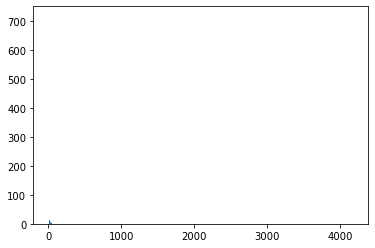

In [13]:
# create a list of frequencies
frequencies = []
for token in tokens : frequencies.append( ( tokens[ token ] ) )

# plot the result
plt.hist( frequencies, bins=(max(frequencies)-min(frequencies)) )
plt.show()

In [14]:
# calculate mean (average), variance, and standard deviation
mean        = sum( frequencies ) / len( frequencies )
variance    = sum( ( frequency-mean )**2 for frequency in frequencies ) / len(frequencies)
deviation   = variance**0.5
print( "mean: %f; variance: %f; deviation: %f" % ( mean, variance, deviation ) )

mean: 12.526991; variance: 13394.581255; deviation: 115.734961


In [15]:
# create a list of second teir "interesting" words

# initialize
n = round( mean + deviation )
frequencies = {}
for token in tokens :

        # re-initialize
        count = tokens[ token ]
        
        # optionally update
        if ( mean <= count <= n ) : frequencies[ token ] = count

# output
print( frequencies )

{'come': 98, 'read': 90, 'bring': 89, 'cause': 87, 'require': 83, 'i': 72, 'receive': 61, 'pleasure': 60, 'mo': 58, 'think': 56, 'apprehend': 56, 'say': 55, 'discover': 54, 'suffer': 52, 'send': 52, 'see': 51, 'keep': 50, 'return': 46, 'believe': 46, 'continue': 45, '[': 45, 'prevent': 45, 'put': 44, 'presume': 42, 'go': 42, 'answer': 41, 'depart': 41, 'let': 41, 'appear': 41, 'observe': 39, 'consider': 39, 'know': 38, 'pay': 37, 'sell': 37, 'serve': 36, 'god': 35, 'set': 34, 'find': 34, 'attend': 34, 'expect': 32, 'please': 30, 'maintain': 30, 'vs': 30, ']': 30, 'enter': 30, 'sea': 29, 'twelve': 28, 'carry': 28, 'enjoy': 27, 'secure': 27, 'sovereign': 27, 'conform': 27, 'allow': 27, 'settle': 26, 'call': 26, 'hereby': 26, 'desire': 25, 'appoint': 25, 'understand': 25, 'till': 25, 'establish': 25, 'deliver': 24, 'render': 24, 'preserve': 24, 'hold': 24, 'almighty': 24, 'leave': 23, 'grant': 22, 'direct': 22, 'repair': 22, 'commit': 22, 'perform': 22, 'seize': 22, 'likewise': 22, 'prese

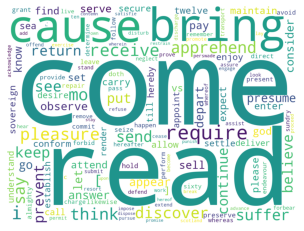

In [16]:
# initialilze a word cloud,...
wordcloud = WordCloud( width=WIDTH, height=HEIGHT, background_color=COLOR )

# ...render it, and display it
plt.imshow( wordcloud.generate_from_frequencies( frequencies ) ) 
plt.axis( "off" ) 
plt.show()